In [1]:
from AnalysisTools import MSNDM_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder_name = "result_summary"
files = ["180-0.5", "180", "180-2", "180-3", "360-0.5", "360", "360-2", "360-3", "720-0.5", "720", "720-2", "720-3"]

In [3]:
data = []
symbols = []
color = []

TQCD = []
scat = []

for fn in files:
    data.append(MSNDM_model(folder_name, fn))
    if fn[0] == '1':
        symbols.append('o')
        TQCD.append(180)
    elif fn[0] == '3':
        symbols.append('x')
        TQCD.append(360)
    elif fn[0] == '7':
        symbols.append('+')
        TQCD.append(720)
        
    if fn[-1] == '0':
        color.append('k')
        scat.append(1)
    elif fn[-1] == '2':
        color.append('g')
        scat.append(2)
    elif fn[-1] == '3':
        color.append('b')
        scat.append(3)
    elif fn[-1] == '5':
        color.append('r')
        scat.append(0.5)

In [4]:
def NSH_max(data, Nsh_max):
    f_max = 0
    m_max = 0
    for i in range(len(data.NSH)):
        for j in range(len(data.NSH[0,:])):
            if data.NSH[i,j] > Nsh_max:
                f_max = max(f_max, data.f[i,j])
                m_max = max(m_max, data.mx_astro[i,j])
    return f_max, m_max

In [5]:
max_sh = np.array([60, 75, 90, 105, 120])
f_max = np.zeros((len(data),len(max_sh)))
m_max = np.zeros((len(data),len(max_sh)))

for i in range(len(max_sh)):
    for j in range(len(data)):
        f_max[j,i], m_max[j,i] = NSH_max(data[j], max_sh[i])

    

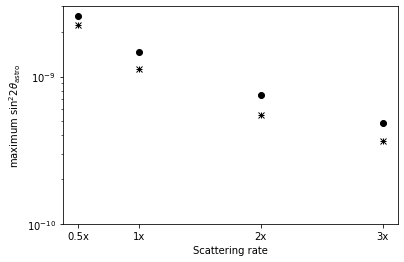

In [6]:
plt.figure()
for i in range(len(data)):
    plt.semilogy(scat[i], m_max[i,0], marker=symbols[i], color='k')
plt.ylim(1e-10, 3e-9)
plt.ylabel(r'maximum $\sin^2 2 \theta_{\rm astro}$')
plt.xlabel('Scattering rate')
plt.xticks([0.5, 1, 2, 3],['0.5x', '1x', '2x', '3x'])
#plt.savefig("scattering-max_angle.png")
plt.show()

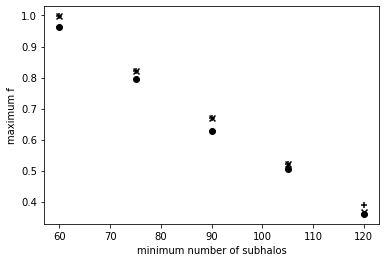

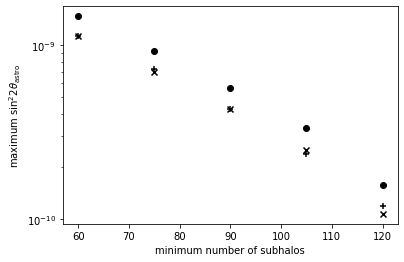

In [7]:
plt.figure()
for i in range(len(data)):
    if scat[i] == 1:
        plt.scatter(max_sh, f_max[i,:], marker=symbols[i], color=color[i])
    plt.ylabel("maximum f")
    plt.xlabel("minimum number of subhalos")
    
plt.figure()
for i in range(len(data)):
    if scat[i] == 1:
        plt.scatter(max_sh, m_max[i,:], marker=symbols[i], color=color[i])
    plt.yscale('log')
    plt.ylabel(r'maximum $\sin^2 2 \theta_{\rm astro}$')
    plt.xlabel("minimum number of subhalos")